### Imports

In [1]:
import GEOparse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
gse = GEOparse.get_GEO(geo="GSE41258", destdir="./")

20-Jan-2026 22:09:29 DEBUG utils - Directory ./ already exists. Skipping.
20-Jan-2026 22:09:29 INFO GEOparse - File already exist: using local version.
20-Jan-2026 22:09:29 INFO GEOparse - Parsing ./GSE41258_family.soft.gz: 
20-Jan-2026 22:09:29 DEBUG GEOparse - DATABASE: GeoMiame
20-Jan-2026 22:09:29 DEBUG GEOparse - SERIES: GSE41258
20-Jan-2026 22:09:29 DEBUG GEOparse - PLATFORM: GPL96
20-Jan-2026 22:09:30 DEBUG GEOparse - SAMPLE: GSM1012278
20-Jan-2026 22:09:31 DEBUG GEOparse - SAMPLE: GSM1012279
20-Jan-2026 22:09:31 DEBUG GEOparse - SAMPLE: GSM1012280
20-Jan-2026 22:09:31 DEBUG GEOparse - SAMPLE: GSM1012281
20-Jan-2026 22:09:31 DEBUG GEOparse - SAMPLE: GSM1012282
20-Jan-2026 22:09:31 DEBUG GEOparse - SAMPLE: GSM1012283
20-Jan-2026 22:09:31 DEBUG GEOparse - SAMPLE: GSM1012284
20-Jan-2026 22:09:31 DEBUG GEOparse - SAMPLE: GSM1012285
20-Jan-2026 22:09:31 DEBUG GEOparse - SAMPLE: GSM1012286
20-Jan-2026 22:09:31 DEBUG GEOparse - SAMPLE: GSM1012287
20-Jan-2026 22:09:31 DEBUG GEOparse - S

In [ ]:
egfr_id = "201983_s_at"

plot_data = []

for gsm_id, gsm in gse.gsms.items():
    expression_value = float(gsm.table.set_index('ID_REF').loc[egfr_id, 'VALUE'])
    meta_str = gsm.metadata.get('characteristics_ch1', [''])[0].lower()

    if 'tumor' in meta_str:
        status = 'Tumor'
    elif 'normal' in meta_str:
        status = 'Normal'
    else:
        continue
    
    plot_data.append({
        'sample_id': gsm_id,
        'EGFR Expression (log2)': expression_value,
        'Status': status
    })

plot_data

[{'sample_id': 'GSM1012286',
  'EGFR Expression (log2)': 263.0,
  'Status': 'Tumor'},
 {'sample_id': 'GSM1012294',
  'EGFR Expression (log2)': 357.0,
  'Status': 'Normal'},
 {'sample_id': 'GSM1012297',
  'EGFR Expression (log2)': 324.0,
  'Status': 'Tumor'},
 {'sample_id': 'GSM1012298',
  'EGFR Expression (log2)': 456.0,
  'Status': 'Normal'},
 {'sample_id': 'GSM1012301',
  'EGFR Expression (log2)': 350.0,
  'Status': 'Normal'},
 {'sample_id': 'GSM1012303',
  'EGFR Expression (log2)': 167.0,
  'Status': 'Tumor'},
 {'sample_id': 'GSM1012304',
  'EGFR Expression (log2)': 77.3,
  'Status': 'Normal'},
 {'sample_id': 'GSM1012305',
  'EGFR Expression (log2)': 169.0,
  'Status': 'Tumor'},
 {'sample_id': 'GSM1012306',
  'EGFR Expression (log2)': 171.0,
  'Status': 'Normal'},
 {'sample_id': 'GSM1012307',
  'EGFR Expression (log2)': 124.0,
  'Status': 'Tumor'},
 {'sample_id': 'GSM1012308',
  'EGFR Expression (log2)': 92.2,
  'Status': 'Tumor'},
 {'sample_id': 'GSM1012310',
  'EGFR Expression (lo

In [4]:
diff_expression_df = pd.DataFrame(plot_data)
diff_expression_df

,sample_id,EGFR Expression (log2),Status
0,GSM1012286,263.0,Tumor
1,GSM1012294,357.0,Normal
2,GSM1012297,324.0,Tumor
3,GSM1012298,456.0,Normal
4,GSM1012301,350.0,Normal
...,...,...,...
255,GSM1012649,376.0,Normal
256,GSM1012651,320.0,Tumor
257,GSM1012652,227.0,Normal
258,GSM1012653,270.0,Normal


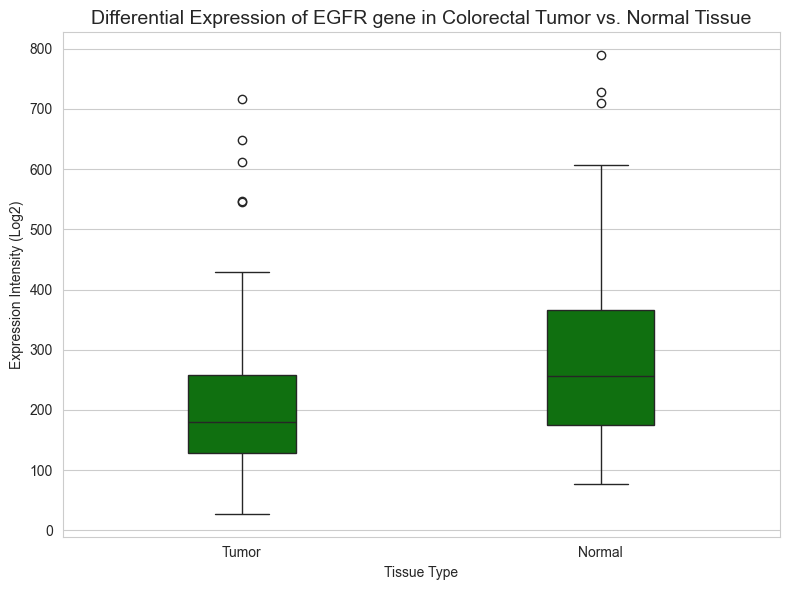

In [6]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

sns.boxplot(x='Status', y='EGFR Expression (log2)', data=diff_expression_df, whis=1.5, width=0.3, color='g')

plt.title(f'Differential Expression of EGFR gene in Colorectal Tumor vs. Normal Tissue', fontsize=14)
plt.ylabel('Expression Intensity (Log2)')
plt.xlabel('Tissue Type')

plt.tight_layout()
plt.show()

p-value: 3.1e-07


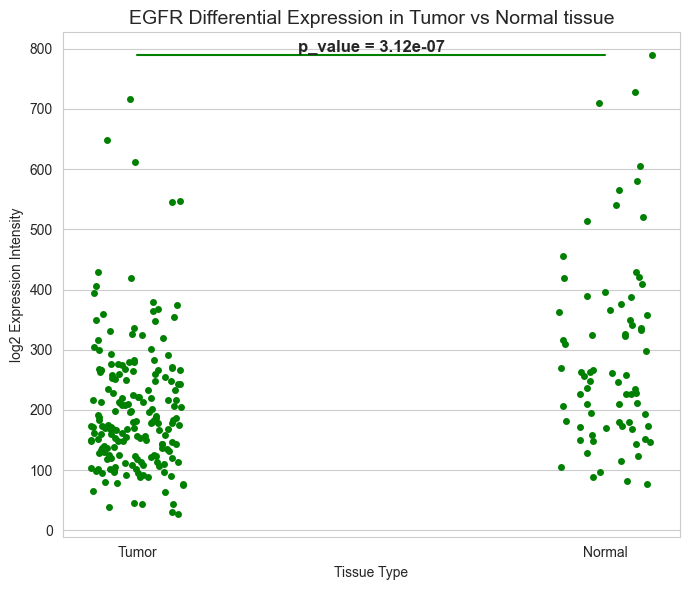

In [9]:
tumor_vals = diff_expression_df[diff_expression_df['Status'] == 'Tumor']['EGFR Expression (log2)']
normal_vals = diff_expression_df[diff_expression_df['Status'] == 'Normal']['EGFR Expression (log2)']

t_test, p_value = ttest_ind(tumor_vals, normal_vals)
print(f"p-value: {p_value:.2}")

plt.figure(figsize=(7, 6))
sns.set_style("whitegrid")

sns.stripplot(x='Status', y='EGFR Expression (log2)', data=diff_expression_df, color='g')

y_max = diff_expression_df['EGFR Expression (log2)'].max()
line_height = y_max
plt.plot([0, 0, 1, 1], [line_height, line_height + 0.2, line_height + 0.2, line_height], lw=1.5, c='g')
plt.text(0.5, line_height + 0.3, f"p_value = {p_value:.2e}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('EGFR Differential Expression in Tumor vs Normal tissue', fontsize=14)
plt.ylabel('log2 Expression Intensity')
plt.xlabel('Tissue Type')

plt.tight_layout()
plt.show()

In [10]:
kras_id = "214352_s_at"

plot_data = []

for gsm_id, gsm in gse.gsms.items():
    expression_value = float(gsm.table.set_index('ID_REF').loc[kras_id, 'VALUE'])
    meta_str = gsm.metadata.get('characteristics_ch1', [''])[0].lower()

    if 'tumor' in meta_str:
        status = 'Tumor'
    elif 'normal' in meta_str:
        status = 'Normal'
    else:
        continue
    
    plot_data.append({
        'sample_id': gsm_id,
        'KRAS Expression (log2)': expression_value,
        'Status': status
    })

plot_data

[{'sample_id': 'GSM1012286',
  'KRAS Expression (log2)': 353.0,
  'Status': 'Tumor'},
 {'sample_id': 'GSM1012294',
  'KRAS Expression (log2)': 248.0,
  'Status': 'Normal'},
 {'sample_id': 'GSM1012297',
  'KRAS Expression (log2)': 354.0,
  'Status': 'Tumor'},
 {'sample_id': 'GSM1012298',
  'KRAS Expression (log2)': 263.0,
  'Status': 'Normal'},
 {'sample_id': 'GSM1012301',
  'KRAS Expression (log2)': 326.0,
  'Status': 'Normal'},
 {'sample_id': 'GSM1012303',
  'KRAS Expression (log2)': 247.0,
  'Status': 'Tumor'},
 {'sample_id': 'GSM1012304',
  'KRAS Expression (log2)': 187.0,
  'Status': 'Normal'},
 {'sample_id': 'GSM1012305',
  'KRAS Expression (log2)': 291.0,
  'Status': 'Tumor'},
 {'sample_id': 'GSM1012306',
  'KRAS Expression (log2)': 495.0,
  'Status': 'Normal'},
 {'sample_id': 'GSM1012307',
  'KRAS Expression (log2)': 232.0,
  'Status': 'Tumor'},
 {'sample_id': 'GSM1012308',
  'KRAS Expression (log2)': 263.0,
  'Status': 'Tumor'},
 {'sample_id': 'GSM1012310',
  'KRAS Expression (

In [11]:
kras_diff_expression_df = pd.DataFrame(plot_data)
kras_diff_expression_df

,sample_id,KRAS Expression (log2),Status
0,GSM1012286,353.0,Tumor
1,GSM1012294,248.0,Normal
2,GSM1012297,354.0,Tumor
3,GSM1012298,263.0,Normal
4,GSM1012301,326.0,Normal
...,...,...,...
255,GSM1012649,187.0,Normal
256,GSM1012651,289.0,Tumor
257,GSM1012652,390.0,Normal
258,GSM1012653,476.0,Normal


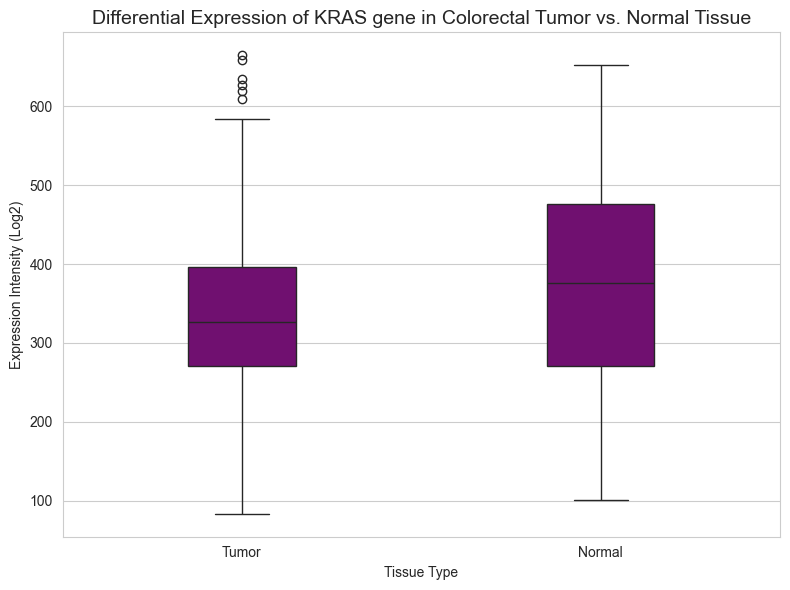

In [13]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

sns.boxplot(x='Status', y='KRAS Expression (log2)', data=kras_diff_expression_df, whis=1.5, width=0.3, color='purple')

plt.title(f'Differential Expression of KRAS gene in Colorectal Tumor vs. Normal Tissue', fontsize=14)
plt.ylabel('Expression Intensity (Log2)')
plt.xlabel('Tissue Type')

plt.tight_layout()
plt.show()

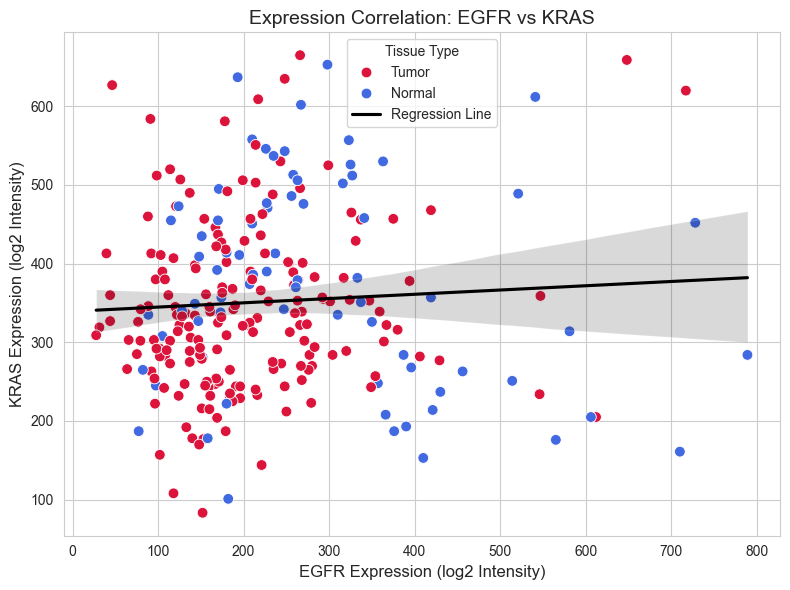

In [16]:
df = pd.merge(diff_expression_df, kras_diff_expression_df)

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

sns.scatterplot(data=df, x='EGFR Expression (log2)', y='KRAS Expression (log2)', hue='Status', 
                palette={'Tumor': 'crimson', 'Normal': 'royalblue'}, s=60)

sns.regplot(data=df, x='EGFR Expression (log2)', y='KRAS Expression (log2)', scatter=False, color='black', 
            label='Regression Line')


plt.title('Expression Correlation: EGFR vs KRAS', fontsize=14)
plt.xlabel('EGFR Expression (log2 Intensity)', fontsize=12)
plt.ylabel('KRAS Expression (log2 Intensity)', fontsize=12)
plt.legend(title='Tissue Type')

plt.tight_layout()
plt.show()